<a href="https://colab.research.google.com/github/bclee232/DLwP/blob/master/9_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pseudocode RNN
def f(state_t, input_t):
  # W and U are matrices and b is bias vector
  return activation(dot(W, input_t) + dot(U, state_t) + b)

state_t = 0 # state at time t
for input_t in input_sequence:
  output_t = f(state_t, input_t)
  state_t = output_t # prev. output is state for next timestep


In [2]:
# naive implementation of RNN
import numpy as np

my_timesteps = 50 # for input seq
my_input_features = 32 # dimensionality of inp. feature space
my_output_features = 64

my_inputs = np.random.random((my_timesteps, my_input_features))
my_state_t = np.zeros((my_output_features,))

my_W = np.random.random((my_output_features, my_input_features))
my_U = np.random.random((my_output_features, my_output_features))
my_b = np.random.random((my_output_features,))

my_outputs = []
for my_input_t in my_inputs:
  my_output_t = np.tanh(np.dot(my_W, my_input_t) + 
                        np.dot(my_U, my_state_t) + 
                        my_b)
  my_outputs.append(my_output_t)
  my_state_t = my_output_t

# 2D tensor of shape (timesteps, output_features)
my_final_output_seq = np.concatenate(my_outputs, axis=0)
print(my_final_output_seq)

[1.         0.99999989 1.         ... 1.         1.         1.        ]


In [5]:
# simple RNN layer in Keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True)) # full state seq. returned
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # last layer only returns output
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
# IMDB example (first preprocess it)
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

max_features = 10000 # 1000 most common words
maxlen = 500 # review cuts off after 500 words
batch_size = 32 # needed?

((train_data, train_targets), 
 (test_data, test_targets)) = imdb.load_data(num_words=max_features)

# pad the data 
x_train = pad_sequences(train_data, maxlen=maxlen)
x_test = pad_sequences(test_data, maxlen=maxlen)
print(x_train.shape, x_test.shape, len(train_data), len(test_data))

17465344/17464789 [==============================] - 0s 0us/step
(25000, 500) (25000, 500) 25000 25000


In [11]:
# train model
from keras.layers import Dense

model2 = Sequential()
model2.add(Embedding(input_dim=max_features, output_dim=32)) # y not 3D?
model2.add(SimpleRNN(32))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model2.fit(x_train, train_targets, epochs=10, batch_size=128, 
                  validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6693 - acc: 0.5810 - val_loss: 0.5684 - val_acc: 0.7074
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4578 - acc: 0.7949 - val_loss: 0.4003 - val_acc: 0.8282
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3186 - acc: 0.8706 - val_loss: 0.5547 - val_acc: 0.7858
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2576 - acc: 0.9008 - val_loss: 0.4264 - val_acc: 0.8360
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1842 - acc: 0.9325 - val_loss: 0.4370 - val_acc: 0.8270
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1218 - acc: 0.9582 - val_loss: 0.4758 - val_acc: 0.8324
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0785 - acc: 0.9750 - val_loss: 0.6010 - val_acc:

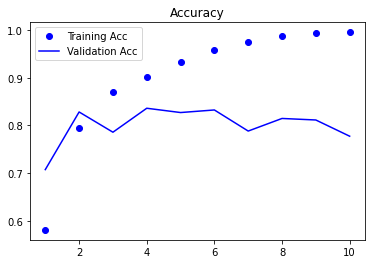

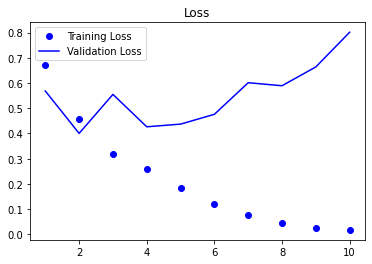

In [13]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs=range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# 84% peak accuracy
# SimpleRNN not optimal for long seq (e.g. text)

In [14]:
# LSTM layers
from keras.layers import LSTM

model3 = Sequential()
model3.add(Embedding(max_features, 32))
model3.add(LSTM(32))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.fit(x_train, train_targets, epochs=5, batch_size=128, 
           validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 66s 3ms/step - loss: 0.5404 - acc: 0.7504 - val_loss: 0.3769 - val_acc: 0.8504
Epoch 2/5
20000/20000 [==============================] - 65s 3ms/step - loss: 0.3075 - acc: 0.8806 - val_loss: 0.2892 - val_acc: 0.8834
Epoch 3/5
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2377 - acc: 0.9108 - val_loss: 0.3224 - val_acc: 0.8614
Epoch 4/5
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2067 - acc: 0.9251 - val_loss: 0.2838 - val_acc: 0.8846
Epoch 5/5
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1791 - acc: 0.9348 - val_loss: 0.4580 - val_acc: 0.8148


In [16]:
model2.evaluate(x_test, test_targets) # 50% test accuracy
model3.evaluate(x_test, test_targets) # 80% test accuracy

25000/25000 [==============================] - 30s 1ms/step


[0.499073562374115, 0.7975999712944031]